In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data
# Combine the data into a single dataset
combined_data= pd.merge(mouse_drug_data,clinical_trial_data, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tomor_volume_df = combined_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)']
volume_df=tomor_volume_df.mean()
# Convert to DataFrame
tomor_response_df=pd.DataFrame(volume_df)
# Preview DataFrame
tomor_response_df.reset_index(inplace=True)
tomor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_sem =tomor_volume_df.sem() 

# Convert to DataFrame
response_df_new=pd.DataFrame(standard_error_sem)
response_df_new.reset_index(inplace=True)
# Preview DataFrame
response_df_new.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
df1=response_df_new.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
df1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
# Minor Data Munging to Re-Format the Data Frames
munging_df=tomor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


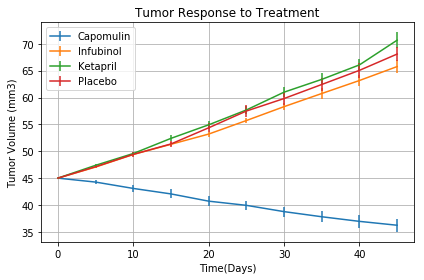

In [7]:
# Generate the Plot (with Error Bars)
cols_plot=['Capomulin','Infubinol','Ketapril','Placebo']

for drugs in cols_plot:
    plt.errorbar(munging_df.index,munging_df[drugs],yerr=df1[drugs])

plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)
#Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = combined_data.groupby(["Drug", "Timepoint"])['Metastatic Sites']
metastatic_mean_df=metastatic_df.mean()
# Convert to DataFrame
metastatic_new_df=pd.DataFrame(metastatic_mean_df)
metastatic_new_df.reset_index(inplace=True)
# Preview DataFrame
metastatic_new_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
df2=metastatic_new_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met =metastatic_df.sem()
# Convert to DataFrame
met_df_new=pd.DataFrame(standard_error_met)
met_df_new.reset_index(inplace=True)
# Preview DataFrame
met_df_new.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df=met_df_new.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


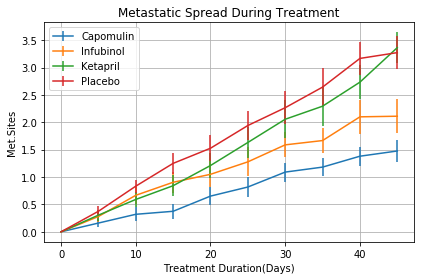

In [13]:
# Generate the Plot (with Error Bars)
cols_plot=['Capomulin','Infubinol','Ketapril','Placebo']

for drugs in cols_plot:
    plt.errorbar(df2.index,df2[drugs],yerr=reformat_df[drugs])
    
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met.Sites')
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)


# Save the Figure
plt.savefig("../Images/Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

survival_df = combined_data.groupby(["Drug", "Timepoint"])['Mouse ID']
mice_count=survival_df.count()
# Convert to DataFrame
survival_new_df=pd.DataFrame(mice_count)
survival_new_df.reset_index(inplace=True)
# Preview DataFrame
survival_new_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames

munging_micecount_df=survival_new_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')


In [16]:

# Preview the Data Frame
munging_micecount_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
df3=  munging_micecount_df * 100/25
df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


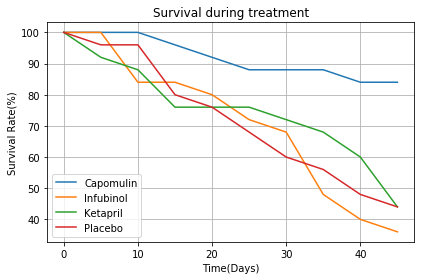

In [18]:
# Generate the Plot (Accounting for percentages)
cols_plot=['Capomulin','Infubinol','Ketapril','Placebo']

for drugs in cols_plot:
    plt.plot(df3.index,df3[drugs])

plt.title('Survival during treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.tight_layout()
plt.legend(loc="best")    
plt.grid(True)
    
# Save the Figure
plt.savefig("../Images/Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug


#def compute_percentage(startpoint,currentpoint):
    #pct= float(x/munging_df['drug'].sum())*100
    #return round(pct,2) 
    #return((float(currentpoint)-startpoint)/abs(startpoint))*100.00
#p['percentage']=p.apply(compute_percentage,axis=0)
#for eachN in drug:
    #pc=compute_percentage(column.index[46]-column.index[0])
# Display the data to confirm


In [35]:
# Calculate the percent changes for each drug
percentage_change=((munging_df.iloc[-1]-munging_df.iloc[0])/munging_df.iloc[0])*100
# Display the data to confirm
percentage_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [36]:
df = pd.DataFrame(percentage_change)
df7 = df.reset_index()

In [38]:
df8 = df7[:4]

In [22]:
x = df8['Drug']
y = df8[0]

In [23]:
df8

,Drug,0
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795


In [24]:
y

0   -19.475303
1    42.516492
2    46.123472
3    57.028795
Name: 0, dtype: float64

[-19.475302667894173, -22.320900462766673]
[42.51649185589744, 46.12347172785187, 57.028794686606076, 53.92334713476923, 51.29796048315153, 47.24117486320637, 52.085134287899024, 46.57975086509525]


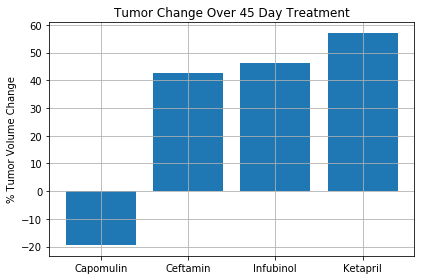

In [41]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = tuple(percentage_change)

# Splice the data between passing and failing drugs

passing_drugs = []
failing_drugs = []
for val in percent_change_tuple:
     if  val < 0:
#checking the percentage changes are less than zero. So the drug passes else fails
         passing_drugs.append(val)
     else:
        failing_drugs.append(val)
print(passing_drugs)
print(failing_drugs)
        
# Orient widths. Add labels, tick marks, etc. 
fig,ax= plt.subplots()
plt.bar(x,y)

# Use functions to label the percentages of changes
#Function autolabel takes 'rects' (a plot handle) and 'ax' the axes object
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        p_height = (height / y_height)
        if p_height > 0:
            label_position = height - (y_height * 0.55)
            plt.setp(rect,color='r')
            #change (failed drugs)
        else:
            label_position = height + (y_height * 0.01)
            plt.setp(rect,color='g') 
            ax.text(rect.get_x() + rect.get_width()/2., label_position,'%d' % int(height),ha='center', va='bottom')
               
               
 # Call functions to implement the function calls
plt.title('Tumor Change Over 45 Day Treatment')
#plt.xlabel('')
plt.ylabel('% Tumor Volume Change')
plt.tight_layout()
#plt.legend(loc="best")    
plt.grid(True)

# Save the Figure
plt.savefig("../Images/Tumor Change Over 45 Days Treatment.png")

# Show the Figure
 #fig.show()